<a href="https://colab.research.google.com/github/gokturkberke/tensorflow-deeplearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

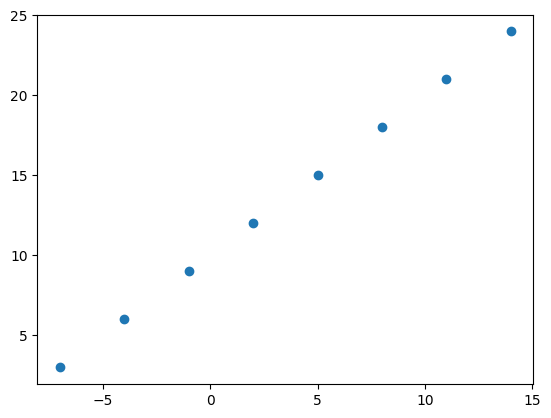

In [ ]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [ ]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1],y[1]

(np.float64(-4.0), np.float64(6.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#Turn our Numpy Arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

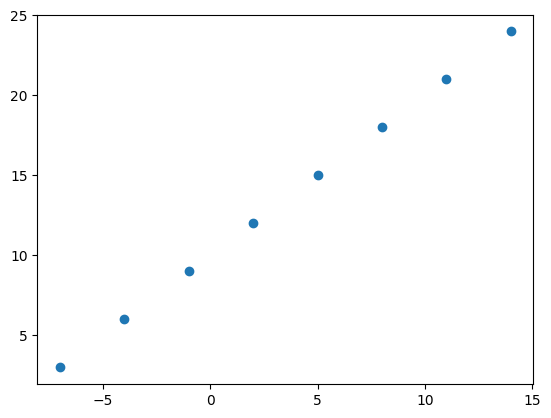

In [ ]:
plt.scatter(X,y)

#Steps in modelling TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compiling a model define the loss function and the optimizer and evaluation metrics
3. Fitting a model - letting the model try to find patterns between X & y


1.   Loss = How wrong your models predictions compared to the truth label
2.   Optimizer = How your model should update its internal paterns to better its predictions
3.   Metrics = Human interpretable values for how well your model is doing




In [ ]:
tf.random.set_seed(42)
# Create the model using Sequential API
model = tf.keras.Sequential([ #sequential katmanlari sirayla(ardisik) eklemek icin kullanilan model tipi
    tf.keras.layers.Dense(1) #icinde 1 adet nöron var yani bu model giristeki veriyi alip tek bir cikti degeri uretir
])

#2. Compile the modle
model.compile(loss = tf.keras.losses.mae, # hata fonksiyonu mae
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastics gradient descent = agirliklari adim adim guncelleyerek kaybi azaltmaya calisir (ogrenme algoritmasi sgd)
              metrics=["mae"]) #egitim sirasinda takip etmek istedigimiz metrik
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) #epochs = 5 tüm veri setini 5 kez bastan sona modelin gormesini sagliyoruz
#Burada axis=-1, sonuna yeni bir boyut ekliyor.

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - loss: 12.3314 - mae: 12.3314
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.1989 - mae: 12.1989
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.0664 - mae: 12.0664
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.9339 - mae: 11.9339
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.8014 - mae: 11.8014


X = [1, 2, 3, 4]
X.shape → (4,)

tf.expand_dims(X, axis=-1).shape → (4, 1)
bu yuzden fitte tf.expand_dims kullaniyoruz

In [ ]:
# Try and make prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
#Improving our model (options are adding more layers(number of tf.keras.layers.dense) change the activation function , increase the number of hidden units,change the optimization function,change the learning rate, fitting on more data , fitting for longer(epochs))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - loss: 9.4408 - mae: 9.4408
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.3083 - mae: 9.3083
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.1758 - mae: 9.1758
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.0433 - mae: 9.0433
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.9108 - mae: 8.9108
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.7783 - mae: 8.7783
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.6458 - mae: 8.6458
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.5133 - mae: 8.5133
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.3808 - mae: 8.3808
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 8.2483 - mae: 8.2483
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.1158 - mae: 8.1158
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.9833 - mae: 7.9833
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/st

In [ ]:
model.predict(tf.expand_dims([17.0],axis=-1)) #much more better

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[30.026236]], dtype=float32)

In [ ]:
#This time with an extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - loss: 13.0246 - mae: 13.0246
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.4546 - mae: 12.4546
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.8973 - mae: 11.8973
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.3272 - mae: 11.3272
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.7446 - mae: 10.7446
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.1429 - mae: 10.1429
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.5335 - mae: 9.5335
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.9370 - mae: 8.9370
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.3128 - mae: 8.3128
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.6621 - mae: 7.6621
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 6.9555 - mae: 6.9555
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.1986 - mae: 6.1986
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[32.322952]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #changed to Adam also added learning rate
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step - loss: 13.5317 - mae: 13.5317
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.8182 - mae: 12.8182
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.0985 - mae: 12.0985
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.3705 - mae: 11.3705
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.6333 - mae: 10.6333
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.8852 - mae: 9.8852
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.1245 - mae: 9.1245
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.3493 - mae: 8.3493
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.5574 - mae: 7.5574
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.7466 - mae: 6.7466
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 6.7476 - mae: 6.7476
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.0965 - mae: 7.0965
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[27.642834]], dtype=float32)

## Evaluating a model

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

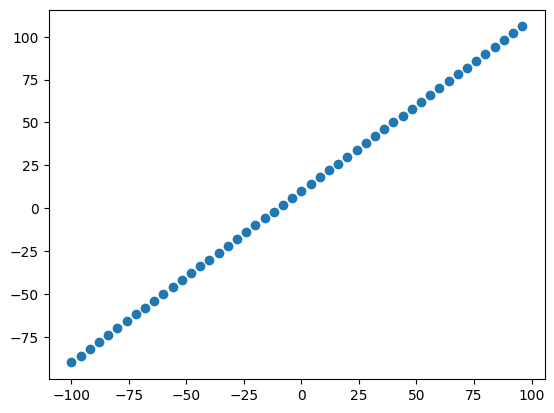

In [ ]:
plt.scatter(X,y)

### The 3 sets

* **Training set** = the model learns from this data typically %70-80 of the total data
* **Validation set** - the model gets tuned on this data 10-15 % data
* **Test set** = the model gets evaluated typically 10-15 %

In [ ]:
len(X)

50

In [ ]:
#Split the data into train and test sets
X_train = X[:40] #first 40 training samples
y_train = y[:40]

X_test = X[40:] #last 10 testing samples
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

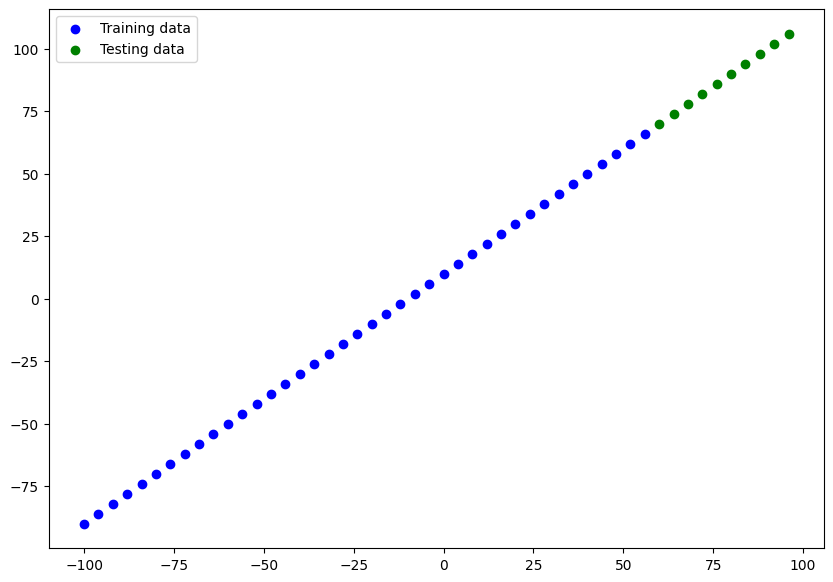

In [ ]:
# Visualizing the data
plt.figure(figsize=(10,7)) #10 × 7 inç
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")

#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")

#Show the legend
plt.legend();

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(X_train,y_train,epochs=100)

In [ ]:
print("X_train:", X_train.shape, X_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)

X_train: (40,) <dtype: 'int32'>
y_train: (40,) <dtype: 'int32'>


In [ ]:
X[0].shape,X[0],y[0]

(TensorShape([]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:

X_train = tf.reshape(X_train, [-1, 1])  # (40,) -> (40, 1)
y_train = tf.reshape(y_train, [-1, 1])  # (40,) -> (40, 1)

# Veri tiplerini float'a çevirin
X_train = tf.cast(X_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

print(f"X_train yeni shape: {X_train.shape}")
print(f"y_train yeni shape: {y_train.shape}")

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_2")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)


X_train yeni shape: (40, 1)
y_train yeni shape: (40, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Parms =  total number of paramteres in the model
* Trainable paramters =  these are the parameters the model can update as it trains
* NON-trainable params = this is typical when you bring in already learn patterns or paramteres from other models during transfer learning!!

# Dense Katmanları — Parametre Hesabı ve Kısa Örnekler

**Parametre sayısı (Dense katmanı için):**

```
params = units * (input_dim + 1)   # +1 bias için
```

---

## Örnek 1 — Çok katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])
```

* İlk katman param = `100 * (1 + 1) = 200`
* İkinci katman param = `1 * (100 + 1) = 101`  (çünkü ikinci katmanın girdi boyutu 100)
* Toplam param = `301`

**model.summary() (örnek çıktı)**

```
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 100)               200
dense_1 (Dense)              (None, 1)                 101
=================================================================
Total params: 301
Trainable params: 301
Non-trainable params: 0
```

---

## Örnek 2 — Tek katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1])
])
```

* Parametre sayısı = `5 * (1 + 1) = 10`

**model.summary() (örnek çıktı)**

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 5)                 10
=================================================================
Total params: 10
Trainable params: 10
Non-trainable params: 0
```

---

## Kısa notlar

* Aktivasyon fonksiyonları (`relu`, `sigmoid`, vb.) **parametre sayısını değiştirmez**; sadece katmanın çıktısını nasıl hesapladığını etkiler.
* Çok büyük `units` sayıları modelin kapasitesini artırır ama **overfitting** riskini ve hesaplama maliyetini yükseltir.
* Giriş verin tek boyutluysa modele verirken `(n,1)` şekline getirin: örn. `X.reshape(-1,1)` veya `tf.expand_dims(X, -1)`.

---

Kopyala-yapıştır yapabileceğin tek sayfa metin bu şekilde hazır. İstersen bu metni Colab'a yapıştırdığında çalıştırılabilir kod blokları halinde de düzenleyeyim.


In [ ]:
model.fit(X_train,y_train,epochs=100,verbose= 0) #verbose eğitim sırasında ekrana ne kadar bilgi yazdırılacağını kontrol eden parametre.
# 0 = hic bilgi yazdirmaz  2 sade satir bilgisi yazdirir bi tane

In [ ]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

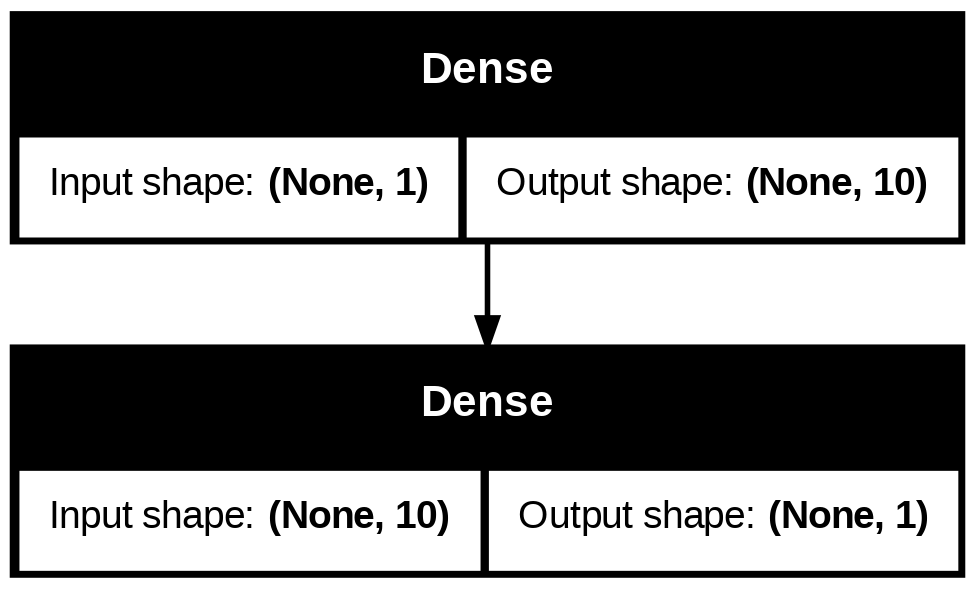

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes=True)

In [ ]:
#Visualize the models predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[ 71.85395 ],
       [ 75.984726],
       [ 80.11551 ],
       [ 84.2463  ],
       [ 88.37708 ],
       [ 92.50786 ],
       [ 96.63863 ],
       [100.769424],
       [104.90021 ],
       [109.03099 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")

  #plot models predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  #Show the legend
  plt.legend();

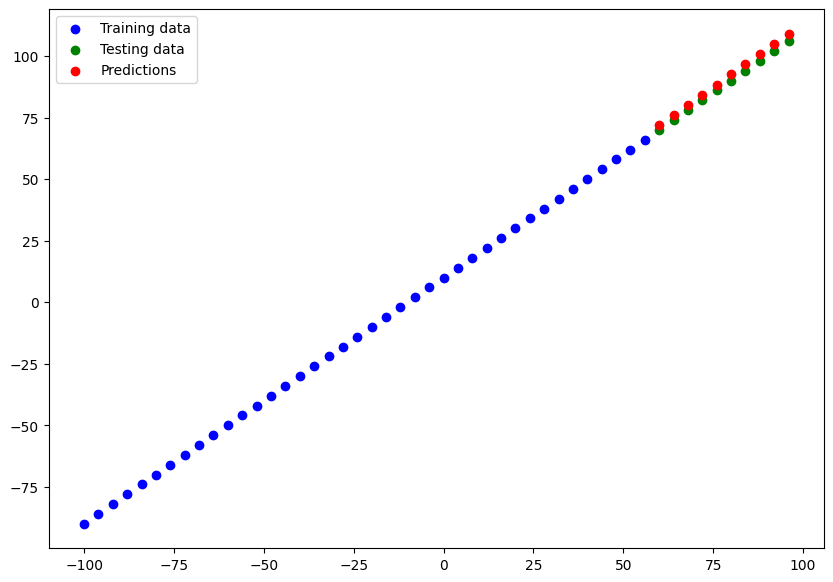

In [ ]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics

In [ ]:
# two main metrics MAE - mean absolute error and MSE - mean square error HUBER = combination of MSE AND MAE
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 2.4425 - mae: 2.4425


[2.4424681663513184, 2.4424681663513184]

In [ ]:
y_pred

array([[ 71.85395 ],
       [ 75.984726],
       [ 80.11551 ],
       [ 84.2463  ],
       [ 88.37708 ],
       [ 92.50786 ],
       [ 96.63863 ],
       [100.769424],
       [104.90021 ],
       [109.03099 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, y_pred).numpy()
mae


np.float32(2.4424682)

In [ ]:
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.4424681663513184>

In [ ]:
#Calculate the mean square error
mse = tf.keras.metrics.MeanSquaredError()(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.106759071350098>

### Running experiments to improve our model

1. Get more data - get more examples for your model
2. Make your model larger
3. Train for longer

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 46.1974 - mae: 46.1974 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.0666 - mae: 14.0666
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.7064 - mae: 8.7064
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.5732 - mae: 8.5732
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3530 - mae: 8.3530
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.0727 - mae: 9.0727
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.1676 - mae: 8.1676
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.7112 - mae: 8.7112
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.5780 - mae: 8.5780
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3458 - mae: 8.3458
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.0890 - mae: 9.0890
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1603 - mae: 8.1603
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


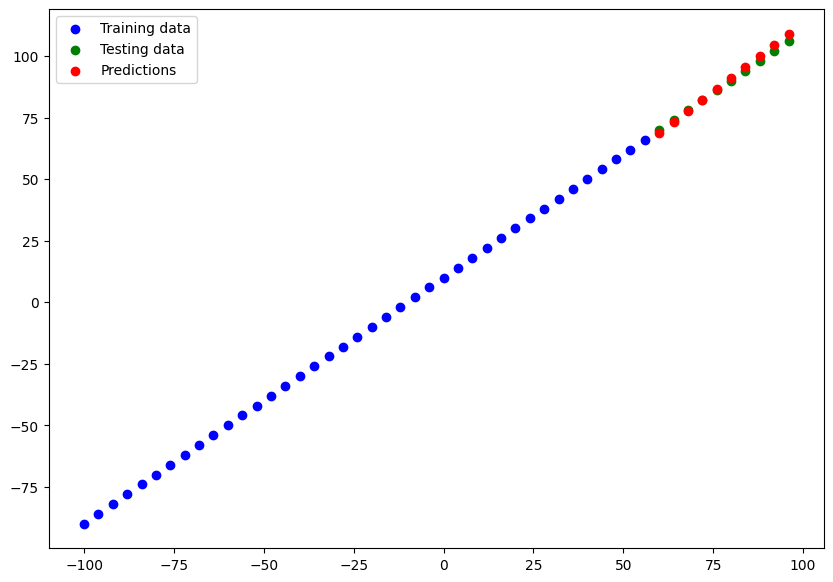

In [ ]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
mae_1 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_1)
mse_1 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3543167114257812>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.6459789276123047>)

In [ ]:
# Build model_2 (2 dense layers trained for 100 epochs)

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30.8784 - mae: 30.8784 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.5084 - mae: 15.5084
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.4575 - mae: 6.4575
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.3556 - mae: 9.3556
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.9867 - mae: 11.9867
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.0283 - mae: 14.0283
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.2079 - mae: 16.2079
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0039 - mae: 5.0039
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.1826 - mae: 14.1826
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7050 - mae: 14.7050
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.8573 - mae: 5.8573
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.5883 - mae: 11.5883
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


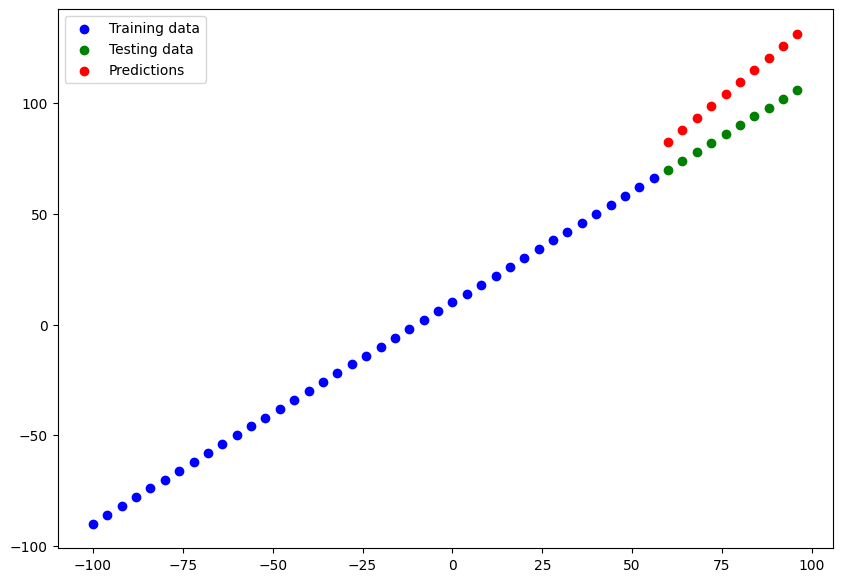

In [ ]:
#Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_2)
mse_2 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=18.910354614257812>,
 <tf.Tensor: shape=(), dtype=float32, numpy=374.50286865234375>)

In [ ]:
#Build model_3  2 layers trainen for 500 epochs
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 69.0223 - mse: 6756.2080 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.3523 - mse: 154.8417
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.8625 - mse: 362.3372
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.2649 - mse: 174.4433
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.5825 - mse: 246.3503
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.7905 - mse: 408.7780
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.6024 - mse: 120.8213
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.6124 - mse: 125.8804
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.6597 - mse: 152.4386
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.7555 - mse: 202.8653
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.8167 - mse: 309.9521
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.1731 - mse: 118.4472
Epoch 13/500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


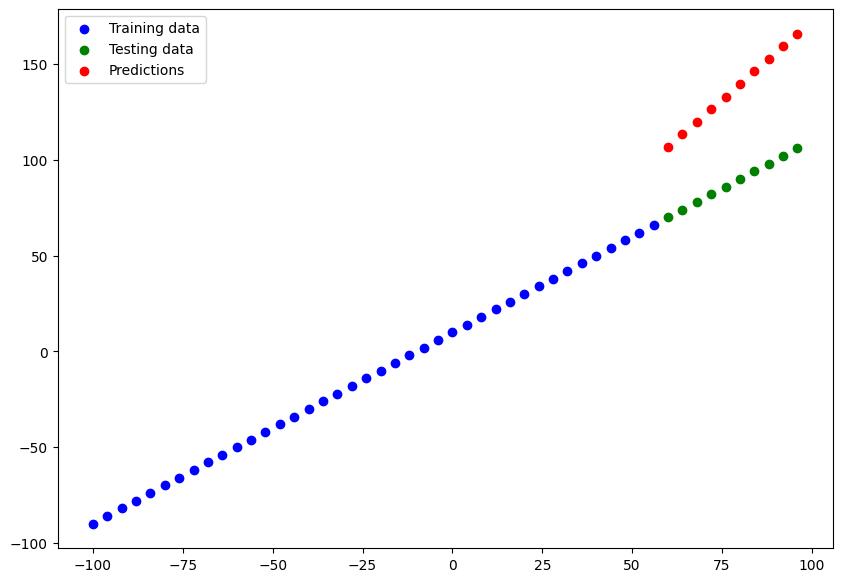

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = tf.keras.metrics.MeanAbsoluteError()(y_test,y_pred_3)
mse_3 = tf.keras.metrics.MeanSquaredError()(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=48.35211944580078>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2392.10498046875>)

In [ ]:
import pandas as pd

model_results  = [["model_1",mae_1.numpy(),mse_1.numpy()],
                  ["model_2",mae_2.numpy(),mse_2.numpy()],
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,1.354317,2.645979
1,model_2,18.910355,374.502869
2,model_3,48.352119,2392.104980


In [ ]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#One of our main goals should be to minimize time between experiments.The more experiment you do the more things you'll figure out  which don't work

## Saving our models

1. TheSavedModel format
2. The HDF5 format

In [ ]:
model_2.save("best_model.keras")
# yüklemek için:
from tensorflow import keras
model = keras.models.load_model("best_model.keras")

In [ ]:
model_2.save("best_model.h5", include_optimizer=True)  # include_optimizer=True ise optimizer durumu da saklanır(ogrenmeye kaldigi yerden devam etme durumu)

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Compare model_2 predictions with savedmodel format model predictions
model_2_preds = model_2.predict(X_test)
model_preds = model.predict(X_test)
model_2_preds == model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded = keras.models.load_model("best_model.h5")

In [ ]:
#Check to see predictions match or not with model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded.predict(X_test)
model_2_preds ==loaded_h5_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from google colab

1. You can go to the files tab and right click on the file you're after and click "download".
2. Use code

In [ ]:
from google.colab import files
files.download("/content/best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#A LARGER EXAMPLE
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"],insurance["smoker"],insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
#we have to turn into numbers some numerical columns
#pd.get_dummies !!!
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
#Create x and y values
X = insurance_one_hot.drop("charges",axis=1) #axis=1 sutün
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
#Create training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#fit
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10191.1182 - mae: 10191.1182   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7640.9131 - mae: 7640.9131 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7434.3086 - mae: 7434.3086 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7698.3589 - mae: 7698.3589 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7394.8403 - mae: 7394.8403 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7358.9575 - mae: 7358.9575 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7660.5215 - mae: 7660.5215 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7671.3784 - mae: 7671.3784 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7953.5654 - mae: 7953.5654 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7615.1045 - mae: 7615.1045 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7618.6699 - mae: 7618.6699 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [ ]:
#Check the results of the insurance model
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6159.1597 - mae: 6159.1597  


[5951.69580078125, 5951.69580078125]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, np.float64(13346.089736364485))

In [ ]:
tf.random.set_seed(42)


insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5023.1191 - mae: 5023.1191  


[4875.201171875, 4875.201171875]

In [ ]:
tf.random.set_seed(42)


insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3468.3022 - mae: 3468.3022  


[3402.035400390625, 3402.035400390625]

Text(0.5, 0, 'epochs')

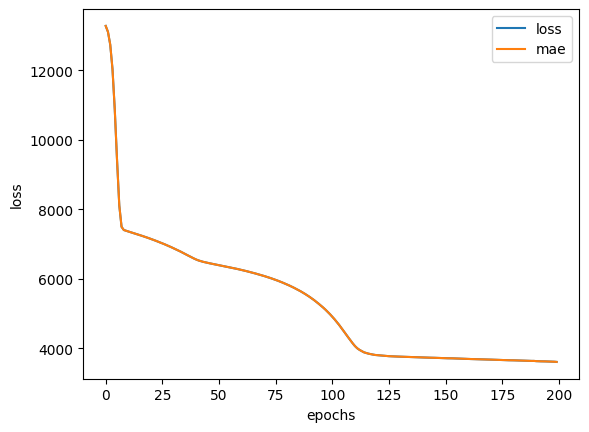

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#### How long we should train for ?

tensorflow earlystoppingcallback which is tensorflow component you can add to your model to stop training once it stops improving a certain metrics

## Prepreocessing data (Normalization and Standardization)
Normalization (Min–Max) — Özellikleri belirli bir aralığa (genelde 0–1) sıkıştırmaktır. Özellikle mesafeye dayalı algoritmalar ve görselleştirme için uygundur.
Formül: x_norm = (x - min) / (max - min)


Standardization (Z-score) — Veriyi ortalaması 0, standart sapması 1 olacak şekilde dönüştürür. Genelde lineer modeller, PCA ve birçok ML algoritması için tercih edilir.
Formül: x_std = (x - mean) / std


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

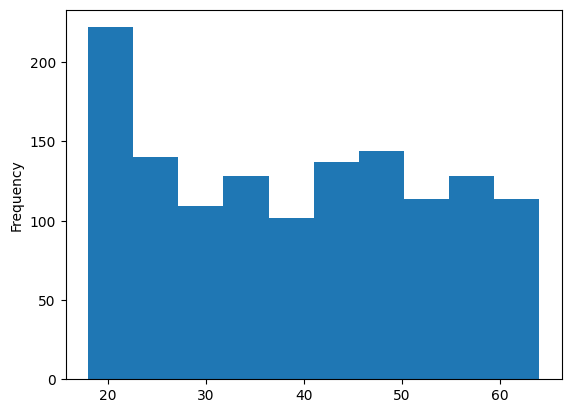

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

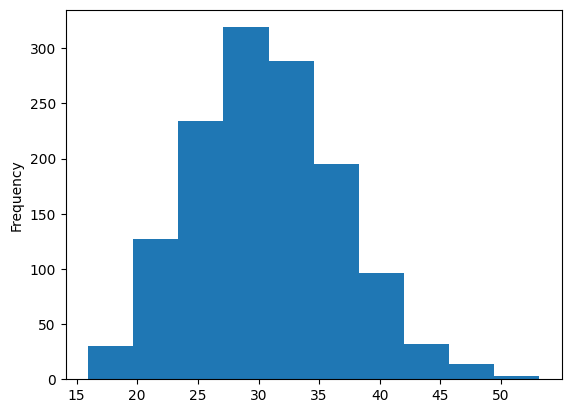

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y values (reimported because)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(minmaxscaler) and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#lets build neural network model and evaluate with the new our x y values
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.4980 - mae: 13297.4980
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13290.5898 - mae: 13290.5898
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13273.7578 - mae: 13273.7578
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13236.6484 - mae: 13236.6484
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13168.0752 - mae: 13168.0752
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13056.9355 - mae: 13056.9355
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12892.3535 - mae: 12892.3535
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12663.8008 - mae: 12663.8008
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12361.3311 - mae: 12361.3311
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11977.3008 - mae: 11977.3008
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11518.0117 - mae: 11518.0117
Epoch 12/200
34/34 ━━━━━━━━━━━

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3214.5305 - mae: 3214.5305  


[3161.389404296875, 3161.389404296875]

In [ ]:
#insurance__model_3 results
#9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3471.8857 - mae: 3471.8857
#[3406.711669921875, 3406.711669921875]

# Exercises

In [ ]:
#create a vector scalar matrix and tensor with values of your choosing using tf.constant()
a = tf.constant(1) #scalar
b = tf.constant([1,2]) #vector
c= tf.constant([[1,2],
                [3,4]]) #matrix
d = tf.constant([[[1,2],[3,4]],[[4,5],[5,6]]]) #tensor
print(a.dtype, b.dtype, c.dtype, d.dtype)

<dtype: 'int32'> <dtype: 'int32'> <dtype: 'int32'> <dtype: 'int32'>


In [ ]:
# find the shape rank and size of the tensors you created in
d.shape,d.ndim,tf.size(d)

(TensorShape([2, 2, 2]), 3, <tf.Tensor: shape=(), dtype=int32, numpy=8>)

In [ ]:
#create two tensors containing random values between 0 and 1 with shape [5,300]
a = tf.random.uniform(shape=[5,300])
b = tf.random.uniform(shape=[5,300])
a,b

# 1 ile 300 araliginda ayni shape int bir tensor ise boyle yapilir
#a = tf.random.uniform(shape=[5, 300], minval=1, maxval=301, dtype=tf.int32)

(<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.7413678 , 0.62854624, 0.01738465, ..., 0.4851334 , 0.21059811,
         0.25082767],
        [0.10842848, 0.48783147, 0.8240961 , ..., 0.9204427 , 0.36046863,
         0.28176582],
        [0.7326695 , 0.46489418, 0.13622475, ..., 0.28130388, 0.63987684,
         0.9987265 ],
        [0.01447165, 0.7845044 , 0.33475304, ..., 0.56194997, 0.0209924 ,
         0.1740731 ],
        [0.90936875, 0.19861352, 0.9481231 , ..., 0.3573054 , 0.13161755,
         0.22565222]], dtype=float32)>,
 <tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.7402308 , 0.33938193, 0.5692506 , ..., 0.08656633, 0.19666708,
         0.7110305 ],
        [0.13257599, 0.81292987, 0.01284087, ..., 0.02695906, 0.2927854 ,
         0.06227863],
        [0.282601  , 0.47868013, 0.77569485, ..., 0.28239357, 0.632112  ,
         0.44452012],
        [0.02029276, 0.7841259 , 0.16919017, ..., 0.26143157, 0.43055534,
         0.47421408],
        [0.26160

In [ ]:
#multiply the tensors you created in 3 using matrix multiplication
c = tf.matmul(a, tf.transpose(b))   #transpose almazsak error 5-300 ile 300 x 5 lik bir matrix caprimi olur kuraldan dolayi
print(c.shape)


(5, 5)


In [ ]:
#multiply the two tensors with dot product
c = tf.tensordot(a, tf.transpose(b), axes=1)
print(c.shape)

(5, 5)


In [ ]:
#Create a tensor with random values between 0 and 1 with shape[224,224,3]
d = tf.random.uniform(shape=[224,224,3],minval=0,maxval=1)
d

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[8.0315602e-01, 4.9777734e-01, 3.7054038e-01],
        [9.1186738e-01, 6.3764203e-01, 1.8209696e-01],
        [6.3791955e-01, 2.7701473e-01, 4.2271137e-02],
        ...,
        [1.0830712e-01, 4.5979273e-01, 2.5716281e-01],
        [8.7138689e-01, 1.8434000e-01, 4.4757760e-01],
        [7.4110627e-02, 9.0852141e-01, 5.3693414e-01]],

       [[5.5596435e-01, 6.8776274e-01, 7.6051474e-02],
        [1.6737962e-01, 7.1785092e-01, 2.7642274e-01],
        [2.6995218e-01, 3.2203627e-01, 8.8224900e-01],
        ...,
        [4.8168826e-01, 5.0150025e-01, 8.6756039e-01],
        [4.1261053e-01, 1.2770486e-01, 5.8186901e-01],
        [2.5495613e-01, 3.9036548e-01, 9.8529553e-01]],

       [[8.0935180e-01, 1.9740558e-01, 3.5899937e-01],
        [1.1216915e-01, 9.1016293e-04, 3.6382091e-01],
        [5.1202202e-01, 3.9188230e-01, 8.8335538e-01],
        ...,
        [2.0133841e-01, 9.1663551e-01, 1.9890130e-01],
        [8.0388057e-01

In [ ]:
#find the min and max values of the tensors you created
tf.reduce_min(d),tf.reduce_max(d)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.4781951904296875e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9999967813491821>)

In [ ]:
#create a tensor with random values [1,224,224,3] then squeeze it to changge the shape [224,224,3]
e = tf.random.uniform(shape=[1,224,224,3])
e_squeezed =tf.squeeze(e)
e_squeezed

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.43555546, 0.52486527, 0.49674678],
        [0.06710219, 0.35815144, 0.5931845 ],
        [0.8396933 , 0.32720697, 0.08762932],
        ...,
        [0.24612641, 0.9342215 , 0.05903411],
        [0.93307066, 0.512503  , 0.48924422],
        [0.97681785, 0.9894414 , 0.81736803]],

       [[0.9728149 , 0.7123945 , 0.24925625],
        [0.27054942, 0.65331674, 0.25431752],
        [0.29969907, 0.6473402 , 0.61158216],
        ...,
        [0.41850114, 0.9183353 , 0.08774114],
        [0.60710025, 0.92464304, 0.29132044],
        [0.14755595, 0.03294516, 0.8127129 ]],

       [[0.90104914, 0.00804007, 0.2443372 ],
        [0.71701133, 0.90716815, 0.21456563],
        [0.7990829 , 0.9918189 , 0.51183915],
        ...,
        [0.8509488 , 0.8159404 , 0.47705805],
        [0.07570207, 0.73422337, 0.3427385 ],
        [0.26765156, 0.38085854, 0.45572805]],

       ...,

       [[0.18761933, 0.00920856, 0.70124197],
        [0.08

In [ ]:
#create a tensor with shape [10] using your own choice of values then find the index which has the maximum value
f = tf.constant([1,2,3,4,5,6,7,8,9,10])
tf.argmax(f)

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
#onehot encode the tensor last you created
f_onehot_encode = tf.one_hot(f,depth=11)
f_onehot_encode

<tf.Tensor: shape=(10, 11), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

## PART 2 EXAMPLES

In [1]:
# Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y values (reimported because)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(minmaxscaler) and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [3]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13297.9814 - mae: 13297.9814
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13294.7637 - mae: 13294.7637
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13290.1885 - mae: 13290.1885
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13283.3027 - mae: 13283.3027
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13273.5625 - mae: 13273.5625
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13260.6611 - mae: 13260.6611
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13244.4863 - mae: 13244.4863
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13225.0293 - mae: 13225.0293
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13202.3232 - mae: 13202.3232
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13176.4160 - mae: 13176.4160
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13147.3613 - mae: 13147.3613
Epoch 12/100
34/34 ━━━━━━━━━━━

In [4]:
#Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss= tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_1.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13297.1738 - mae: 13297.1738
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13293.7197 - mae: 13293.7197
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13285.8389 - mae: 13285.8389
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13267.4961 - mae: 13267.4961
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13228.0732 - mae: 13228.0732
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13151.3008 - mae: 13151.3008
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13015.3311 - mae: 13015.3311
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12793.1631 - mae: 12793.1631
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12452.7822 - mae: 12452.7822
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11960.6162 - mae: 11960.6162
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11315.7314 - mae: 11315.7314
Epoch 12/100
34/34 ━━━━━━━━━━━

In [5]:
#Try and improve the results we got on the insurance dataset, some things you might want to try include:
# Building a larger model (how does one with 4 dense layers go?).
# Increasing the number of units in each layer.
# Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
# What happens if you train for longer (say 300 epochs instead of 200)?
# Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13285.4902 - mae: 13285.4902
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12849.2783 - mae: 12849.2783
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9944.0820 - mae: 9944.0820  
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7884.4941 - mae: 7884.4941
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7521.6201 - mae: 7521.6201
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7138.5610 - mae: 7138.5610
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6643.9756 - mae: 6643.9756
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5924.2388 - mae: 5924.2388
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4843.7583 - mae: 4843.7583
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3831.4148 - mae: 3831.4148
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3633.8044 - mae: 3633.8044
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

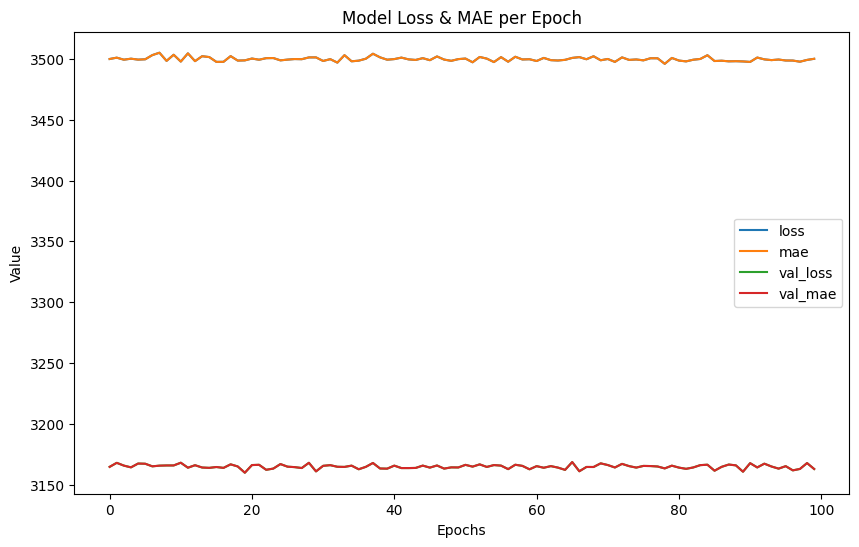

In [7]:
#increasing the number of units
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train_normal,y_train,epochs=100)

history_2 = insurance_model_2.fit(
    X_train_normal,
    y_train,
    epochs=100,
    validation_data=(X_test_normal, y_test)  # validation eklemek iyi olur
)

import pandas as pd
import matplotlib.pyplot as plt

# History verilerini DataFrame'e çevir
history_df = pd.DataFrame(history_2.history)

# Grafiği çiz
history_df.plot(figsize=(10, 6))
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Model Loss & MAE per Epoch")
plt.show()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 530.5345 - mae: 21.1110 - val_loss: 590.0214 - val_mae: 22.4660
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 492.4496 - mae: 20.1470 - val_loss: 543.2198 - val_mae: 21.3988
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 446.2233 - mae: 18.9348 - val_loss: 480.2954 - val_mae: 19.9168
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 385.5081 - mae: 17.3066 - val_loss: 398.5857 - val_mae: 17.8582
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 309.6802 - mae: 15.2712 - val_loss: 301.7327 - val_mae: 15.1871
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 225.2640 - mae: 12.7831 - val_loss: 203.3157 - val_mae: 12.2082
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 146.6820 - mae: 10.0642 - val_loss: 126.2218 - val_mae: 9.1811
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 92.6555 - mae: 7.9580 - val_loss:

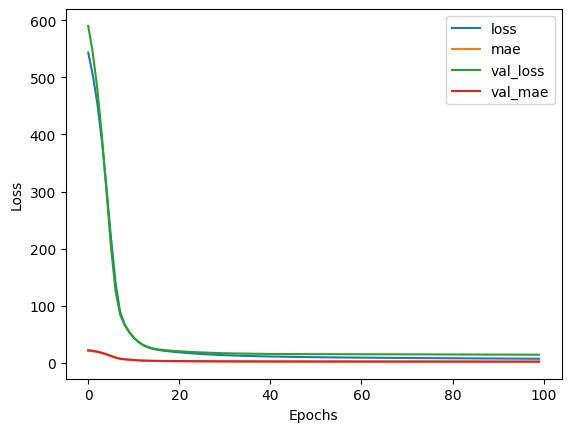

In [8]:
from tensorflow.keras.datasets import boston_housing

# Veriyi yükle
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalize et
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Model kur
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

boston_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history_boston = boston_model.fit(train_data, train_targets,
                                  validation_split=0.2,
                                  epochs=100)

pd.DataFrame(history_boston.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()
